In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

# 1 Trees and Random Forests
## (b) Applying a classification tree

In [3]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

digits, labels = load_digits(return_X_y=True)
N, p = digits.shape
print(digits.shape) # 1797*64

N_test = 200
N_val = 200
N_train = N - N_test - N_val
indices = np.random.permutation(N)
print(indices)

train_data, train_label = digits[indices[:N_train]], labels[indices[:N_train]]
val_data, val_label = digits[indices[N_train:(N_train+N_val)]], labels[indices[N_train:(N_train+N_val)]]
test_data, test_label = digits[indices[-N_test:]], labels[indices[-N_test:]]
print(train_data.shape, val_data.shape, test_data.shape)
# print(np.bincount(train_label), np.bincount(val_label), np.bincount(test_label))


(1797, 64)
[1096 1435  299 ...  216  634  488]
(1397, 64) (200, 64) (200, 64)


In [4]:
results = {}
for n_tree in [5, 10, 20, 100]:
    for split in ["gini", "entropy"]:
        for depth in [2,5,10,"pure"]:
            d = None if depth == "pure" else depth
            model = RandomForestClassifier(n_estimators=n_tree, criterion=split, max_depth=d)
            model.fit(train_data, train_label)
            acc = np.mean(model.predict(val_data) == val_label)
            # print(f"{n_tree}/{split[:3]}/{depth}: \t{acc:.3f}")
            results[f"{n_tree}/{split[:3]}/{depth}"] = acc

c:\users\1\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
c:\users\1\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


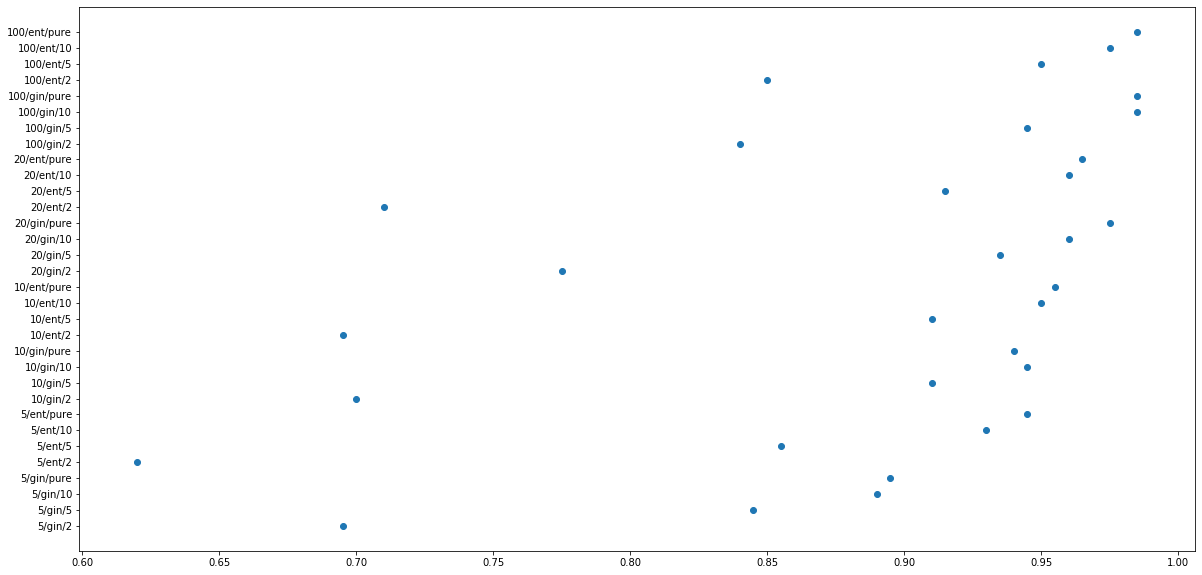

In [5]:
plt.scatter(results.values(),np.arange(len(results.values())))
plt.axes().set_yticks(np.arange(len(results.keys())))
plt.axes().set_yticklabels(np.array(list(results.keys())));

In [6]:
np.array(list(results.items()))[np.argsort(list(results.values()))] # Somewhat messy, but good enough for now

array([['5/ent/2', '0.62'],
       ['5/gin/2', '0.695'],
       ['10/ent/2', '0.695'],
       ['10/gin/2', '0.7'],
       ['20/ent/2', '0.71'],
       ['20/gin/2', '0.775'],
       ['100/gin/2', '0.84'],
       ['5/gin/5', '0.845'],
       ['100/ent/2', '0.85'],
       ['5/ent/5', '0.855'],
       ['5/gin/10', '0.89'],
       ['5/gin/pure', '0.895'],
       ['10/gin/5', '0.91'],
       ['10/ent/5', '0.91'],
       ['20/ent/5', '0.915'],
       ['5/ent/10', '0.93'],
       ['20/gin/5', '0.935'],
       ['10/gin/pure', '0.94'],
       ['5/ent/pure', '0.945'],
       ['10/gin/10', '0.945'],
       ['100/gin/5', '0.945'],
       ['10/ent/10', '0.95'],
       ['100/ent/5', '0.95'],
       ['10/ent/pure', '0.955'],
       ['20/ent/10', '0.96'],
       ['20/gin/10', '0.96'],
       ['20/ent/pure', '0.965'],
       ['20/gin/pure', '0.975'],
       ['100/ent/10', '0.975'],
       ['100/gin/10', '0.985'],
       ['100/gin/pure', '0.985'],
       ['100/ent/pure', '0.985']], dtype='<U12')

In [7]:
# Retrain the best model
model = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=None)
model.fit(np.concatenate([train_data, val_data]), np.concatenate([train_label, val_label]))
print(model.predict(test_data) == test_label)  # why np.mean  and since we have test data, why we need validation
acc = np.mean(model.predict(test_data) == test_label)
print(f"Test set accuracy: {acc:.3f}")

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

# 3 QDA & LDA
## (a) QDA: Implementation and visualization of the posterior

In [8]:
def normal(x, mu, sigma): 
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))

def posterior(lik1, lik2):
    return lik1/(lik1 + lik2)

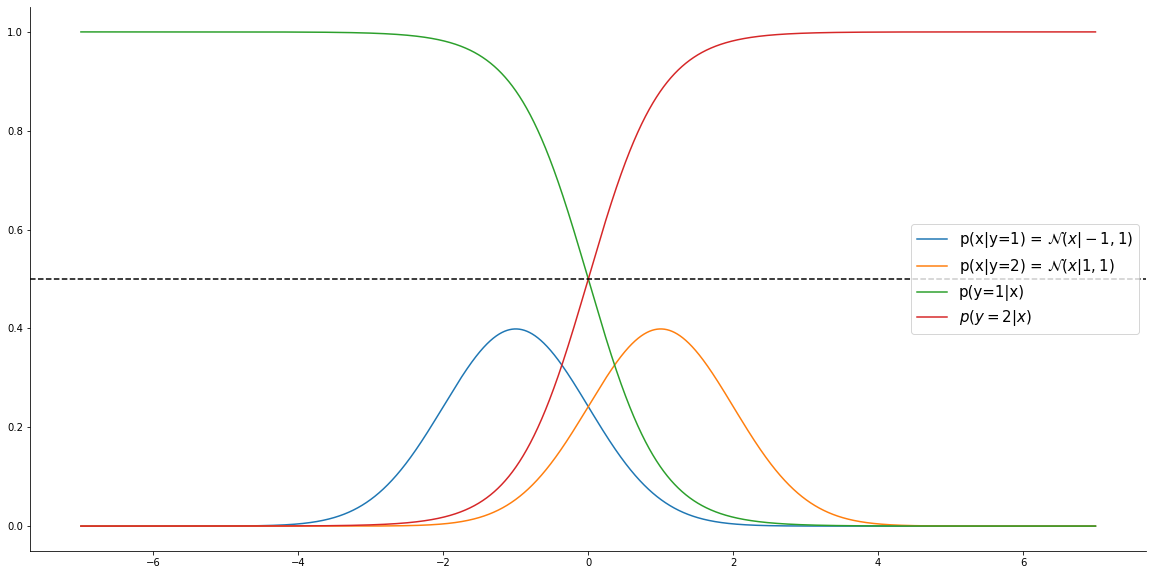

In [10]:
xseq = np.arange(-7,7,0.001)
post_prob_1 = posterior(normal(xseq, -1, 1), normal(xseq, 1,1))
plt.plot(xseq, normal(xseq, -1, 1), label=r"p(x|y=1) = $\mathcal{N}(x|-1,1)$")
plt.plot(xseq, normal(xseq, 1, 1), label=r"p(x|y=2) = $\mathcal{N}(x|1,1)$")
plt.plot(xseq, post_prob_1, label=r"p(y=1|x)")
plt.plot(xseq, 1 - post_prob_1, label=r"$p(y=2|x)$")
plt.axhline(y=0.5, linestyle="dashed", color="black")
plt.legend(fontsize=15)
sns.despine()

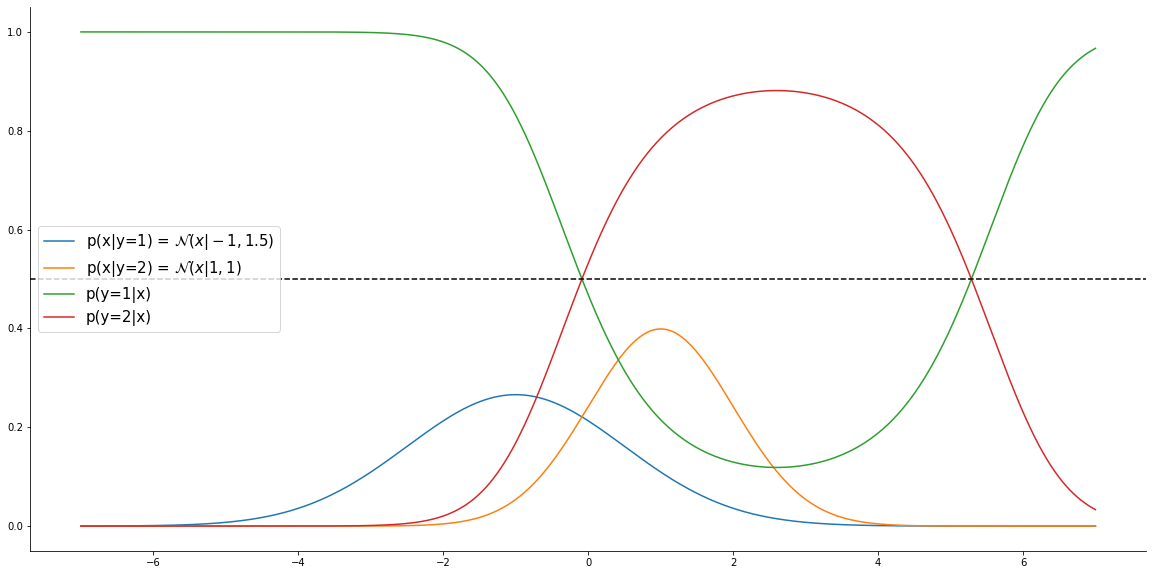

In [11]:
xseq = np.arange(-7,7,0.001)
post_prob_1 = posterior(normal(xseq, -1, 1.5), normal(xseq, 1,1))
plt.plot(xseq, normal(xseq, -1, 1.5), label=r"p(x|y=1) = $\mathcal{N}(x|-1,1.5)$")
plt.plot(xseq, normal(xseq, 1, 1), label=r"p(x|y=2) = $\mathcal{N}(x|1,1)$")
plt.plot(xseq, post_prob_1, label=r"p(y=1|x)")
plt.plot(xseq, 1- post_prob_1, label=r"p(y=2|x)")
plt.axhline(y=0.5, linestyle="dashed", color="black")
plt.legend(fontsize=15)
sns.despine()